In [194]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [129]:
df = pd.read_csv('summarized.csv')
df.head()

,Unnamed: 0,value,total_seconds,type,date
0,0,C#,108.293,languages,2020-10-01
1,1,Rider,108.293,editors,2020-10-01
2,2,HashSetDifference,108.293,projects,2020-10-01
3,3,Rust,2768.170,languages,2020-10-12
4,4,CMake,2054.230,languages,2020-10-12


In [181]:
df['date'] = pd.to_datetime(df['date'])

grouped = df[df.type == 'languages'].groupby(['date', 'value'])['total_seconds'].sum()
unstacked = grouped.unstack('value')
cumulative = unstacked.cumsum().ffill()
cumulative.head()

value,.env file,AUTO_DETECTED,Apache Config,Assembly,Assembly file,Bash,Batchfile,BibTeX,Blazor,C,...,VimL,XAML,XML,YAML,protobuf,reStructuredText,systemd,textmate,tmux,tsconfig
date,,,,,,,,,,,,,,,,,,,,,
2016-10-22,NaN,NaN,NaN,NaN,NaN,NaN,284.513934,NaN,NaN,238.115000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-23,NaN,NaN,NaN,NaN,NaN,NaN,1444.222925,NaN,NaN,245.714954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-24,NaN,NaN,NaN,NaN,NaN,1475.824889,1444.222925,NaN,NaN,245.714954,...,NaN,NaN,NaN,1926.958246,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-25,NaN,NaN,NaN,NaN,NaN,1475.824889,1444.222925,NaN,NaN,245.714954,...,21.207674,NaN,NaN,1926.958246,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-26,NaN,NaN,NaN,NaN,NaN,1478.723866,1444.222925,NaN,NaN,245.714954,...,21.207674,NaN,NaN,1926.958246,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
cumulative.tail()

value,.env file,AUTO_DETECTED,Apache Config,Assembly,Assembly file,Bash,Batchfile,BibTeX,Blazor,C,...,VimL,XAML,XML,YAML,protobuf,reStructuredText,systemd,textmate,tmux,tsconfig
date,,,,,,,,,,,,,,,,,,,,,
2023-07-20,2270.926818,928.723,1.165864,327.99652,5.125,105609.334031,2587.47069,33196.583861,383.203,116127.877574,...,21.207674,2145.152,91832.252102,749008.855479,6721.688,6.110232,51.16846,5090.218344,108.024231,1169.722
2023-07-21,2270.926818,928.723,1.165864,327.99652,5.125,105728.459031,2587.47069,33196.583861,383.203,116127.877574,...,21.207674,2145.152,91832.252102,749022.657479,6721.688,6.110232,51.16846,5090.218344,108.024231,1169.722
2023-07-22,2270.926818,928.723,1.165864,327.99652,5.125,120608.542765,2587.47069,33196.583861,383.203,116127.877574,...,21.207674,2145.152,91832.252102,754813.854623,6721.688,6.110232,51.16846,5090.218344,108.024231,1169.722
2023-07-23,2270.926818,928.723,1.165864,327.99652,5.125,120608.542765,2587.47069,33196.583861,383.203,116127.877574,...,21.207674,2145.152,91832.252102,754813.854623,6721.688,6.110232,51.16846,5090.218344,108.024231,1169.722
2023-07-24,2270.926818,928.723,1.165864,327.99652,5.125,127274.431119,2587.47069,33196.583861,383.203,116127.877574,...,21.207674,2145.152,93069.816674,754814.539634,6721.688,6.110232,51.16846,5090.218344,108.024231,1169.722


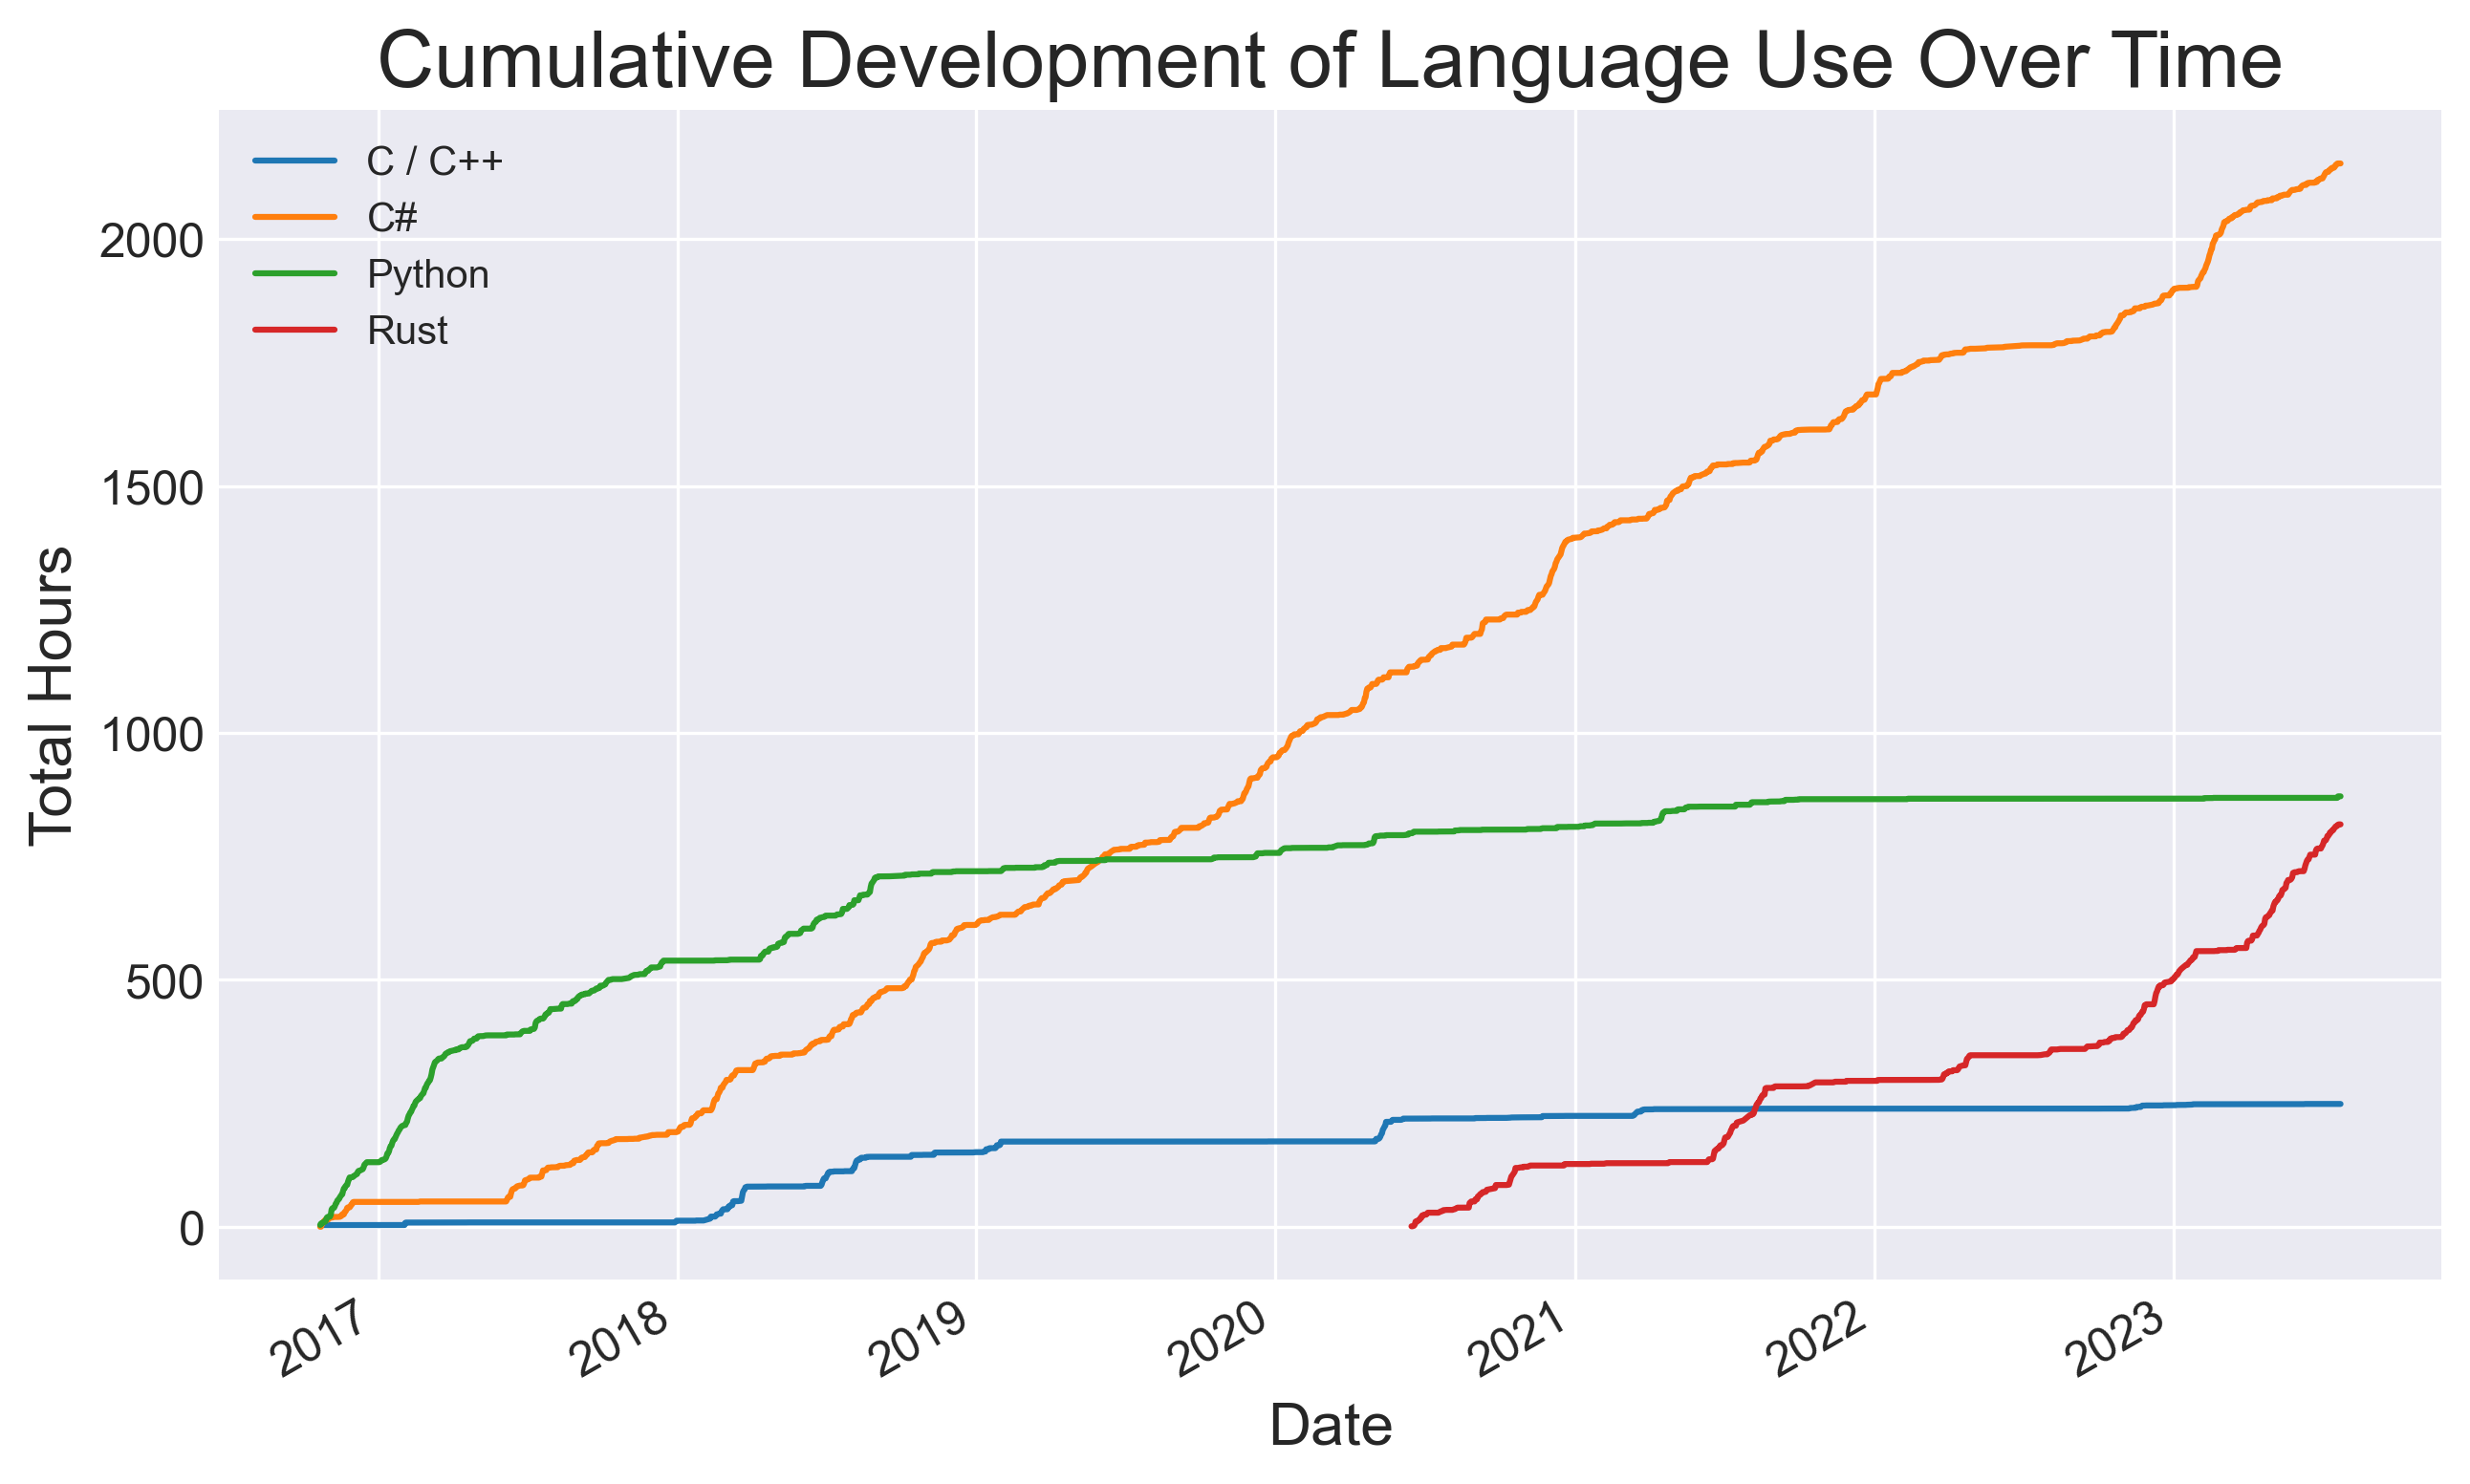

In [210]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Style elements
plt.grid(True)

# Filter columns with final cumulative sum that is high enough to be interesting
# interesting_cols = cumulative.columns[cumulative.iloc[-1] >= 0.5e6]
cumulative['C / C++'] = cumulative['C'] + cumulative['C++']
interesting_cols = ['C / C++', 'C#', 'Python', 'Rust']
filtered = cumulative[interesting_cols]
filtered = filtered / 3600
filtered.plot(kind = 'line', ax=ax)

# Set Title & Labels with increased font size
ax.set_title("Cumulative Development of Language Use Over Time", fontsize=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Total Hours', fontsize=15)

# Increase tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Enable legend
ax.legend()

# Display the plot
plt.show()